In [1]:
import pandas as pd
from pathlib import Path
import os
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind

In [33]:
os.getcwd()

full_path = "/home/gus/Documents/REPOS/tmt-analysis/data/processed/"
base_path = str(Path(full_path).parents[1])  # "path"
non_digital_path = 'non_digital_df.csv'

In [34]:
df_non_digital = pd.read_csv(full_path + non_digital_path)
df_non_digital

,subject_id,mmse,tmt_a_raw,tmt_a_z,tmt_b_raw,tmt_b_z,digit_symbol_raw,digit_symbol_z,forward_digit_span_raw,forward_digit_span_z,backward_digit_span_raw,backward_digit_span_z,clock_drawing_test,group
0,2,28.0,47.00,0.36,82.00,0.85,36.0,0.67,6.0,0.07,5.0,0.50,3.0,0
1,3,28.0,65.00,-0.38,107.00,0.40,45.0,0.33,5.0,0.64,4.0,0.21,3.0,1
2,5,25.0,63.00,-0.29,180.09,-0.92,32.0,0.00,5.0,-0.64,3.0,-0.93,1.0,1
3,6,29.0,35.87,0.02,49.91,1.25,54.0,0.33,7.0,0.79,5.0,0.50,3.0,0
4,8,26.0,50.00,0.24,65.00,1.16,65.0,2.67,6.0,0.07,4.0,-0.21,3.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69,97,27.0,38.90,0.69,93.70,0.64,28.0,0.00,7.0,1.58,4.0,0.80,3.0,1
70,98,29.0,40.36,-0.63,140.00,0.19,46.0,1.00,5.0,-0.08,4.0,0.80,3.0,1
71,99,29.0,51.80,0.16,78.30,0.92,42.0,0.67,6.0,0.75,6.0,2.80,3.0,1
72,100,29.0,50.42,0.22,69.40,1.08,40.0,0.67,8.0,2.42,5.0,1.80,3.0,0


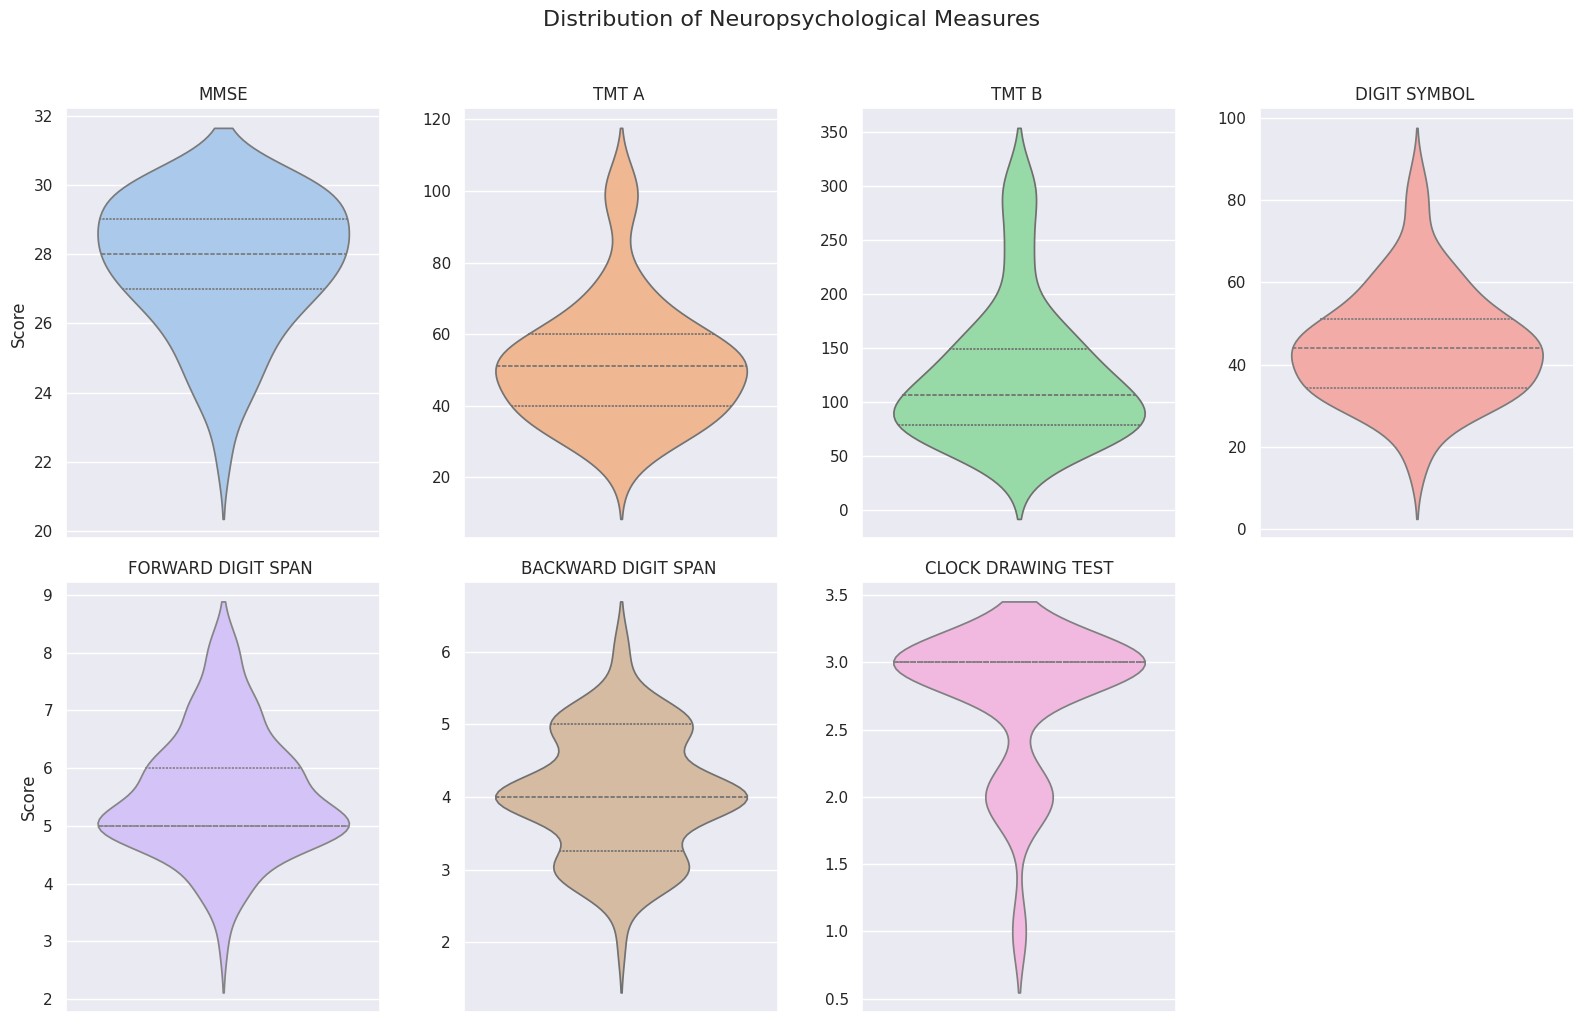

In [46]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# Drop 'subject_id' and 'group' if you only want to plot the neuropsychological measures.
# If 'group' is to be used for hue, keep it. For this request, we'll plot all numeric columns except subject_id.
df_plot = df_non_digital.drop(columns=['subject_id'], errors='ignore')

# Set a style for the plots
sns.set_theme(style="darkgrid", palette="Set2")

# Select the columns to plot
df_plot = df_non_digital.copy()

df_plot = df_plot[[col for col in df_plot.columns if not col.endswith("_z")]].drop(columns=['subject_id', 'group'], errors='ignore')

# Determine the grid size
num_cols = 4
num_rows = (len(df_plot.columns) + num_cols - 1) // num_cols

# Create the figure and axes
fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(num_cols * 4, num_rows * 5), sharey=False)
fig.suptitle('Distribution of Neuropsychological Measures', fontsize=16, y=1.02) # Add a title to the entire figure

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Generate a violin plot for each column
for i, col in enumerate(df_plot.columns):
    if (i == 0) or (i % 4 == 0):
        axes[i].set_ylabel('Score')
    else:
        axes[i].set_ylabel(' ')
    sns.violinplot(y=df_plot[col], ax=axes[i], inner='quartile', color=sns.color_palette("pastel")[i % len(sns.color_palette("pastel"))])
    axes[i].set_title(col.replace('_', ' ').upper().replace(" RAW", " "), fontsize=12)
    axes[i].tick_params(axis='x', bottom=False, labelbottom=False)

# Hide any unused subplots
for i in range(len(df_plot.columns), len(axes)):
    axes[i].set_visible(False)

plt.tight_layout()
plt.show()

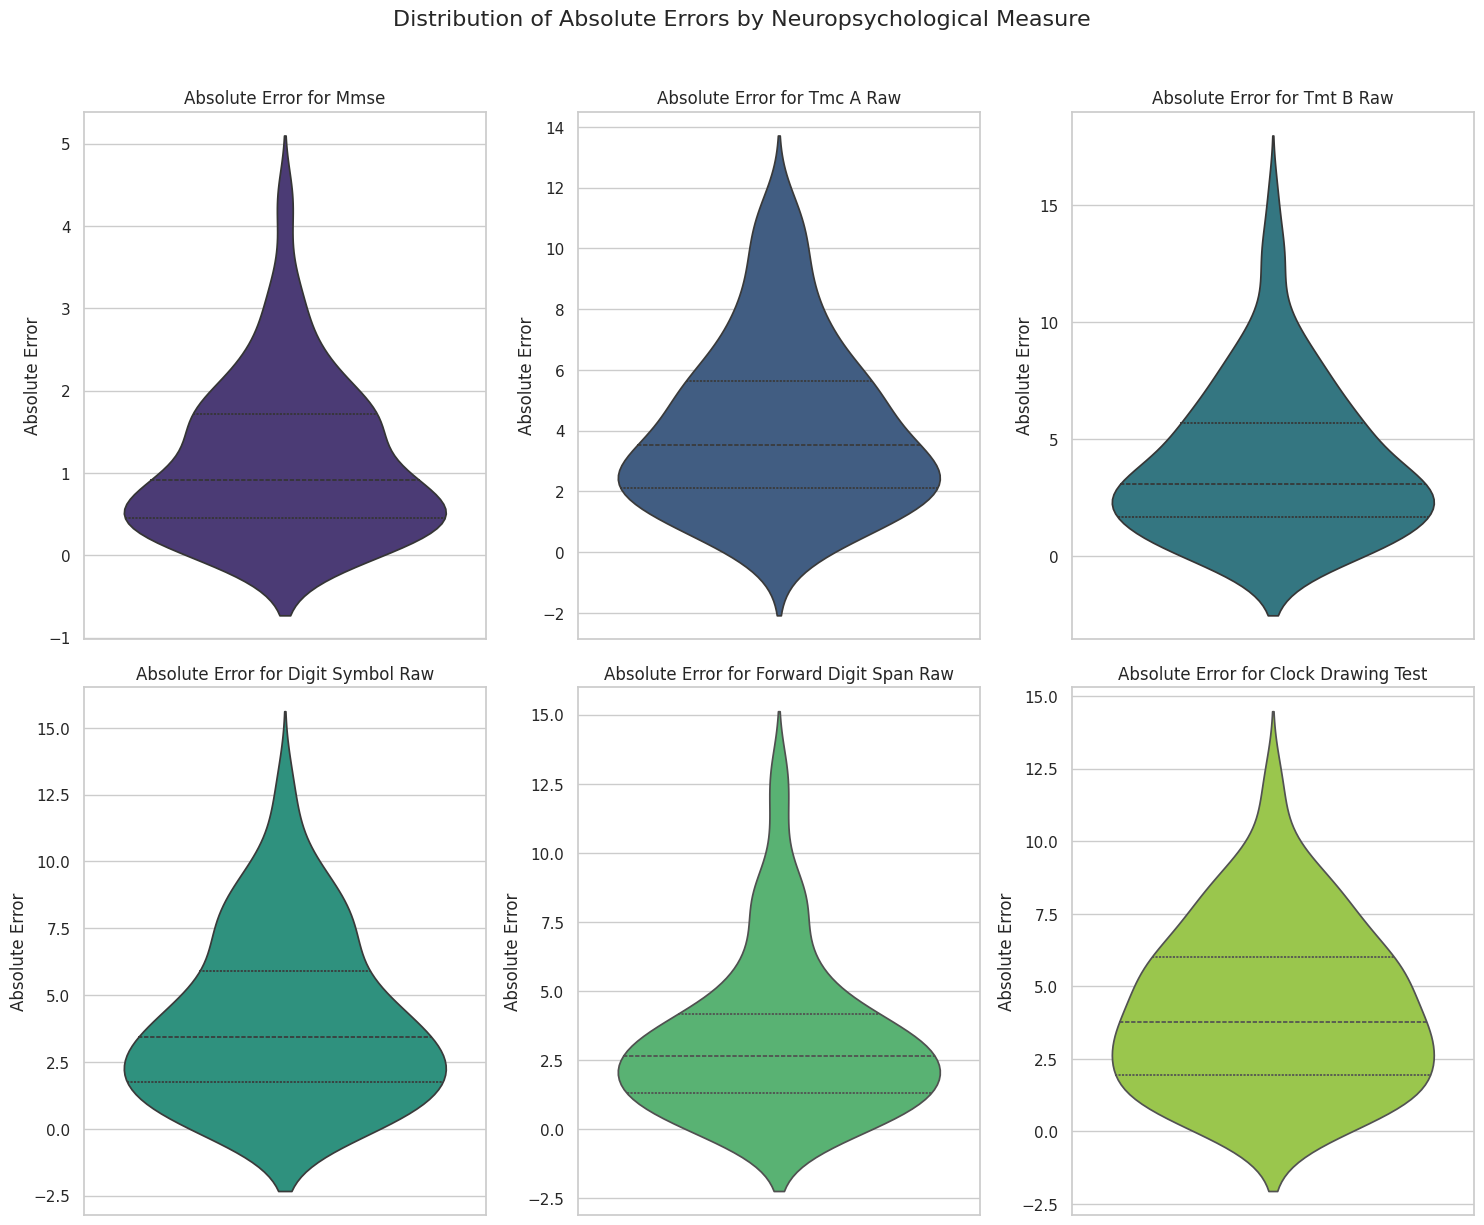

In [29]:
import pandas as pd
import numpy as np

# Assuming you have these DataFrames (replace with your actual data)
# For example purposes, let's create some dummy data
targets = ['mmse', 'tmc_a_raw', 'tmt_b_raw', 'digit_symbol_raw', 'forward_digit_span_raw', 'clock_drawing_test']
data_size = 100
np.random.seed(42)

y_true = pd.DataFrame({
    'mmse': np.random.randint(20, 31, size=data_size),
    'tmc_a_raw': np.random.normal(50, 15, size=data_size),
    'tmt_b_raw': np.random.normal(100, 30, size=data_size),
    'digit_symbol_raw': np.random.normal(40, 10, size=data_size),
    'forward_digit_span_raw': np.random.randint(4, 9, size=data_size),
    'clock_drawing_test': np.random.randint(1, 4, size=data_size)
})

y_pred = y_true + np.random.normal(0, 5, size=y_true.shape) # Add some noise for predictions
y_pred['mmse'] = y_true['mmse'] + np.random.normal(0, 1.5, size=data_size) # Adjust noise for each variable

# Calculate the absolute error for each subject and each target
absolute_errors = (y_true - y_pred).abs()


import matplotlib.pyplot as plt
import seaborn as sns

# Set a clean style for the plots
sns.set_theme(style="whitegrid", palette="pastel")

# Determine the grid size for the subplots
num_targets = len(absolute_errors.columns)
num_cols = 3  # You can adjust the number of columns
num_rows = (num_targets + num_cols - 1) // num_cols

fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(num_cols * 5, num_rows * 6), sharey=False)
fig.suptitle('Distribution of Absolute Errors by Neuropsychological Measure', fontsize=16, y=1.02)

# Flatten the axes array for easier iteration
axes = axes.flatten()

# Plot each error distribution
for i, col in enumerate(absolute_errors.columns):
    sns.violinplot(y=absolute_errors[col], ax=axes[i], inner='quartile', color=sns.color_palette("viridis")[i % len(sns.color_palette("viridis"))])
    axes[i].set_title(f'Absolute Error for {col.replace("_", " ").title()}', fontsize=12)
    axes[i].set_ylabel('Absolute Error')
    axes[i].tick_params(axis='x', bottom=False, labelbottom=False)

# Hide any unused subplots
for i in range(num_targets, len(axes)):
    axes[i].set_visible(False)

plt.tight_layout()
plt.show()

<Axes: >

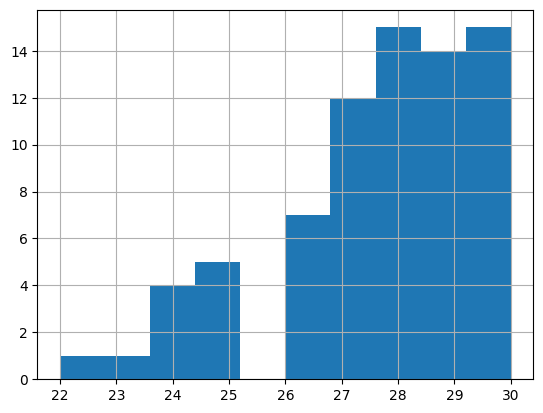

In [32]:
df_non_digital['mmse'].hist()
plt.vlines(x, ymin, ymax, colors='k', linestyles='solid', label='', *, data=None, **kwargs)

In [27]:
data = df_non_digital['clock_drawing_test']

# Calculate Q1 (25th percentile)
Q1 = data.quantile(0.25)

# Calculate Q3 (75th percentile)
Q3 = data.quantile(0.75)

# Calculate the Interquartile Range (IQR)
IQR = Q3 - Q1

print(f"First Quartile (Q1): {Q1}")
print(f"Third Quartile (Q3): {Q3}")
print(f"Interquartile Range (IQR): {IQR}")

First Quartile (Q1): 3.0
Third Quartile (Q3): 3.0
Interquartile Range (IQR): 0.0


In [30]:
data.value_counts()

clock_drawing_test
3.0    56
2.0    15
1.0     3
Name: count, dtype: int64

<Axes: >

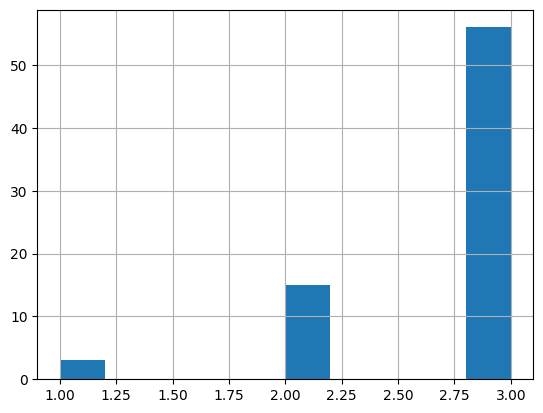

In [31]:
data.hist()

In [25]:
df_non_digital.describe()

,subject_id,mmse,tmt_a_raw,tmt_a_z,tmt_b_raw,tmt_b_z,digit_symbol_raw,digit_symbol_z,forward_digit_span_raw,forward_digit_span_z,backward_digit_span_raw,backward_digit_span_z,clock_drawing_test,group
count,74.000000,74.000000,74.000000,74.000000,74.000000,73.000000,74.000000,74.000000,74.000000,74.000000,74.000000,74.000000,74.000000,74.000000
mean,49.445946,27.675676,51.972432,-0.021081,124.373378,4.133151,44.513514,0.804595,5.540541,0.010946,4.040541,0.166892,2.716216,0.554054
std,30.568200,1.945195,17.236815,0.709925,64.003203,35.127925,13.653484,0.861536,1.049321,0.995629,0.818271,0.878317,0.536867,0.500463
min,2.000000,22.000000,23.010000,-1.930000,45.480000,-3.820000,14.000000,-1.000000,3.000000,-2.070000,2.000000,-1.640000,1.000000,0.000000
25%,22.250000,27.000000,39.947500,-0.350000,78.772500,-0.430000,34.250000,0.330000,5.000000,-0.640000,3.250000,-0.210000,3.000000,0.000000
50%,46.500000,28.000000,51.070000,0.070000,106.235000,0.400000,44.000000,0.670000,5.000000,0.070000,4.000000,-0.145000,3.000000,1.000000
75%,78.750000,29.000000,60.015000,0.480000,148.595000,0.870000,51.000000,1.330000,6.000000,0.685000,5.000000,0.725000,3.000000,1.000000
max,101.000000,30.000000,103.000000,1.170000,300.000000,300.000000,86.000000,3.000000,8.000000,2.700000,6.000000,2.800000,3.000000,1.000000


In [22]:
non_digital_describe = df_non_digital.describe()


non_digital_describe.loc['75%'] - non_digital_describe.loc['25%']

subject_id                 56.5000
mmse                        2.0000
tmt_a_raw                  20.0675
tmt_a_z                     0.8300
tmt_b_raw                  69.8225
tmt_b_z                     1.3000
digit_symbol_raw           16.7500
digit_symbol_z              1.0000
forward_digit_span_raw      1.0000
forward_digit_span_z        1.3250
backward_digit_span_raw     1.7500
backward_digit_span_z       0.9350
clock_drawing_test          0.0000
group                       1.0000
dtype: float64

In [3]:
CLASSIFICATION_TARGET = 'group'
def join_on_subject(df1: pd.DataFrame, df2: pd.DataFrame) -> pd.DataFrame:
    # Avoid duplicating group column if it exists in both DataFrames
    if CLASSIFICATION_TARGET in df1.columns and CLASSIFICATION_TARGET in df2.columns:
        df2 = df2.drop(columns=CLASSIFICATION_TARGET)

    return pd.merge(df1, df2, on='subject_id', how='inner')

def load_all_datasets() -> dict:
    path = base_path + '/data/processed'
    return {
        'df_digital_tmt_with_target': pd.read_csv(os.path.join(path, 'df_digital_tmt_with_target.csv')),
        'demographic_df': pd.read_csv(os.path.join(path, 'demographic_df.csv')),
        'non_digital_df': pd.read_csv(os.path.join(path, 'non_digital_df.csv')),
    }

datasets = load_all_datasets()

df_demo = datasets['demographic_df']


df_digital_plus_demo = join_on_subject(datasets['df_digital_tmt_with_target'], datasets['demographic_df'])

df_non_digital = datasets['non_digital_df']

df_digital = datasets['df_digital_tmt_with_target']

df_non_digital_plus_demo = join_on_subject(datasets['non_digital_df'], datasets['demographic_df'])



In [6]:
kbest = {'average_duration_PART_B': 0.0475321612303589, 'distance_difference_from_ideal_PART_A': 0.03383053449026025, 'hesitation_time_PART_A': 0.046492290357927936, 
         'intra_target_time_PART_A': 0.041340383709062074, 'max_duration_PART_B': 0.05584613359180039, 'non_cut_correct_targets_touches_PART_A': 0.07159284954763334, 
         'non_cut_correct_targets_touches_PART_B': 0.0844026195472562, 'non_cut_rt_PART_A': 0.04888538684282573, 'non_cut_rt_PART_B': 0.08281456718355108, 
         'rt_PART_A': 0.038857580277840344, 'rt_PART_B': 0.011247750113221253, 'search_time_PART_B': 0.02417236521366346, 'total_distance_PART_A': 0.005538270121558623, 
         'travel_distance_PART_B': 0.04022394055406963, 'travel_time_PART_A': 0.03880206847726513, 'non_cut_correct_targets_touches_B_A_ratio': 0.0579972396471236, 
         'state_transitions_B_A_ratio': 0.05581030824788367, 'travel_avg_speed_B_A_ratio': 0.03821137973570969, 'is_valid_sum_B': 0.035066329534672286, 
         'age': 0.04733906044096322, 'hesitation_distance_PART_A': 0.020804811208475566, 'max_duration_PART_A': 0.031851647601239506, 
         'average_duration_B_A_ratio': 0.02701095917651765, 'average_duration_PART_A': 0.0018094245807042926, 'search_avg_speed_PART_B': 0.0012888558261973002, 
         'max_duration_B_A_ratio': 0.001099900477135038, 'travel_distance_B_A_ratio': 0.0015405276863517275, 'is_valid_sum_A': 0.0041886799147946826, 
         'state_transitions_PART_A': 0.001505982511473519, 
         'search_time_PART_A': 0.0018459883877542738, 'total_hesitations_PART_A': 0.0005680645844267244, 'travel_time_PART_B': 0.00048193918028287703}

kbest_list = list(kbest.keys())

In [8]:
def histograms_for_col(df):
    results = []  
    
    for col in df.columns[1:-1]:   # adjust depending on your column layout
        groups = [data[col].dropna() for _, data in df.groupby("group")]

        # Welch’s t-test
        t_stat, p_val = ttest_ind(groups[0], groups[1], equal_var=False)

        # Format p-value for plot
        if p_val < 0.001:
            p_str = f"{p_val:.2e}"
        else:
            p_str = f"{p_val:.3f}"

        # Plot histograms
        for label, data in df.groupby("group"):
            plt.hist(data[col], bins=10, alpha=0.5, label=f"Group {label}")

        plt.xlabel(col)
        plt.ylabel("Count")
        plt.title(f"{col} (t={t_stat:.2f}, p={p_str})")
        plt.legend()
        plt.show()

        # Save raw values (keep numeric p for sorting/filtering later)
        results.append({"variable": col, "t_stat": t_stat, "p_value": p_val})

    # Convert results to DataFrame
    results_df = pd.DataFrame(results)
    return results_df


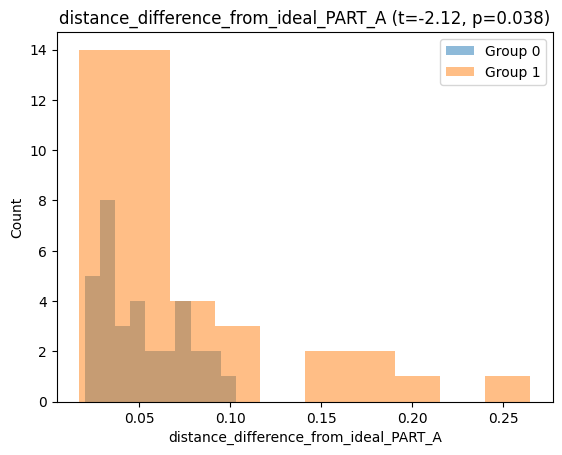

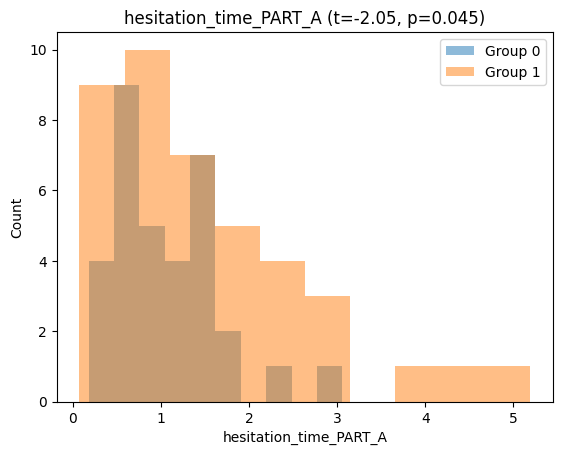

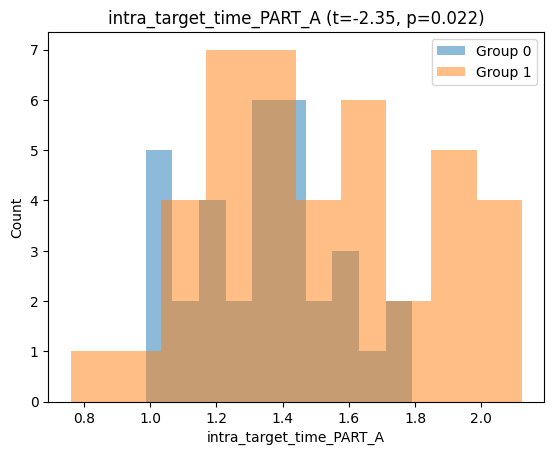

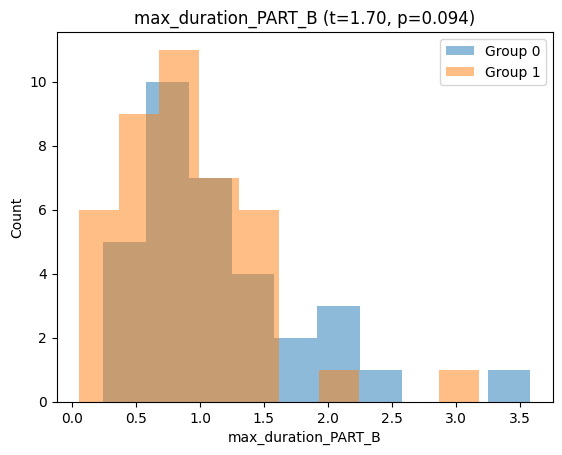

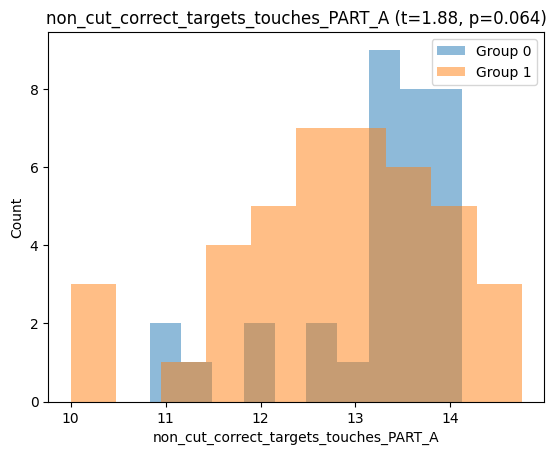

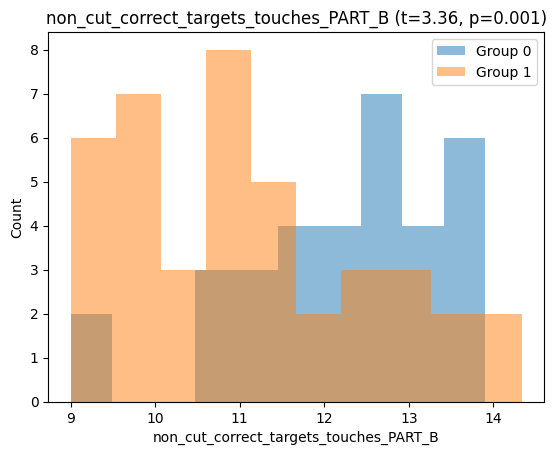

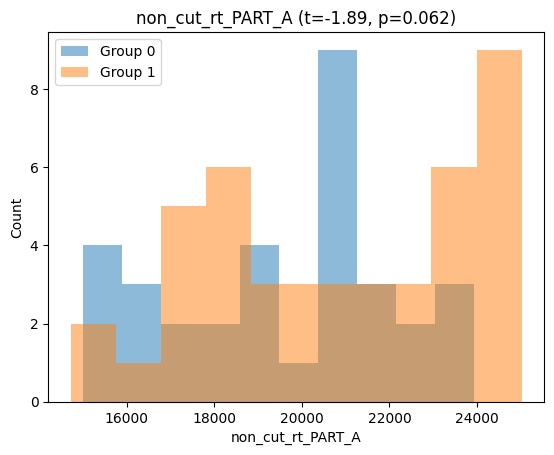

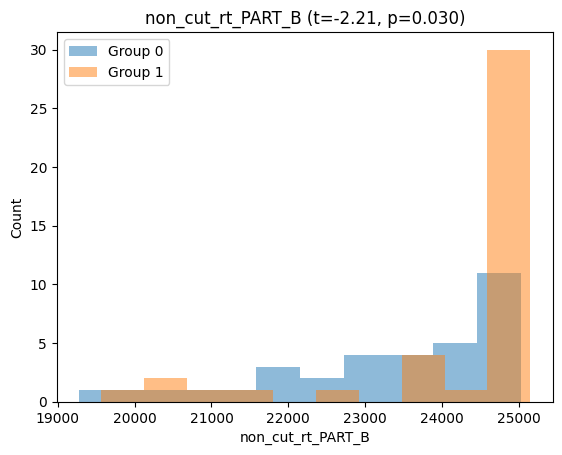

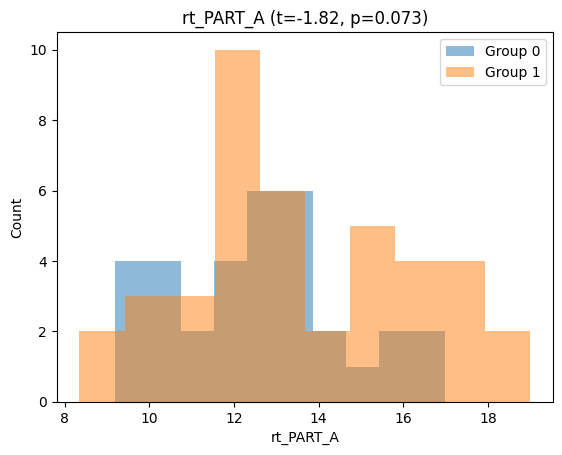

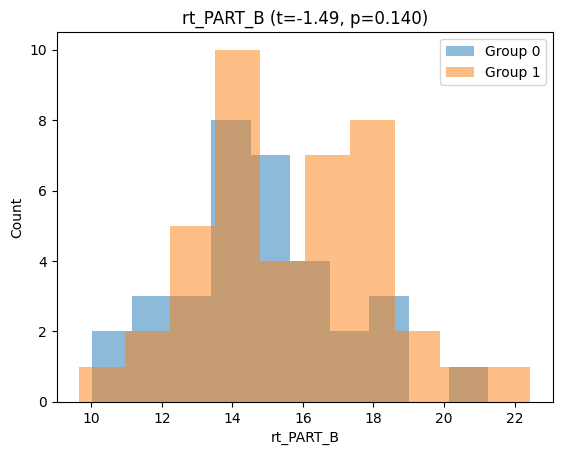

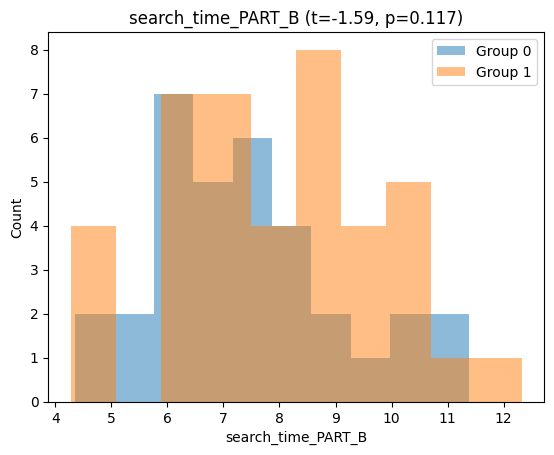

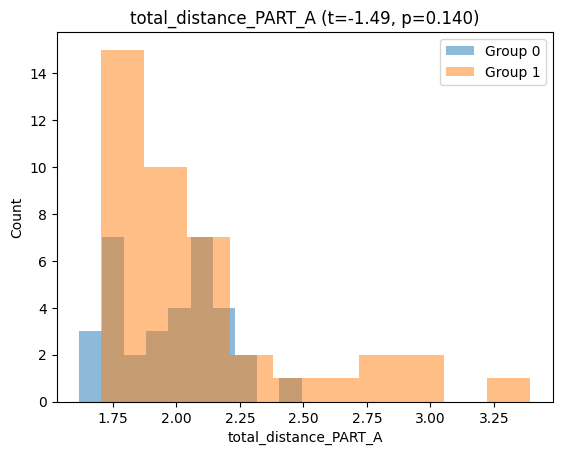

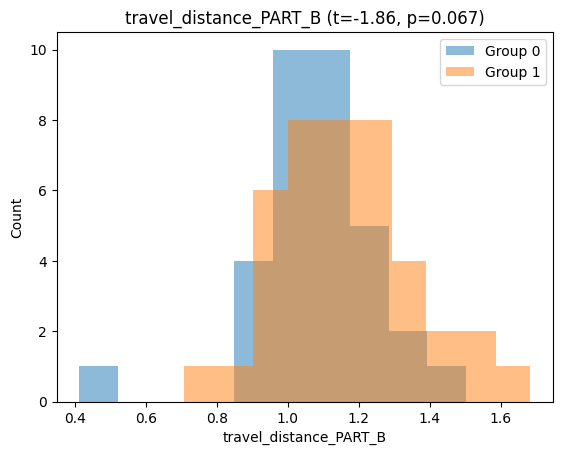

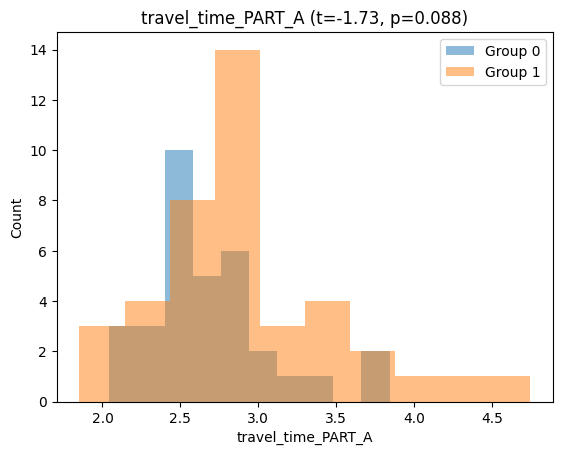

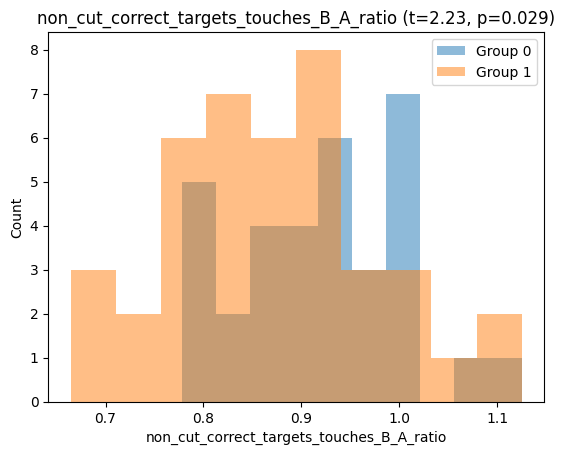

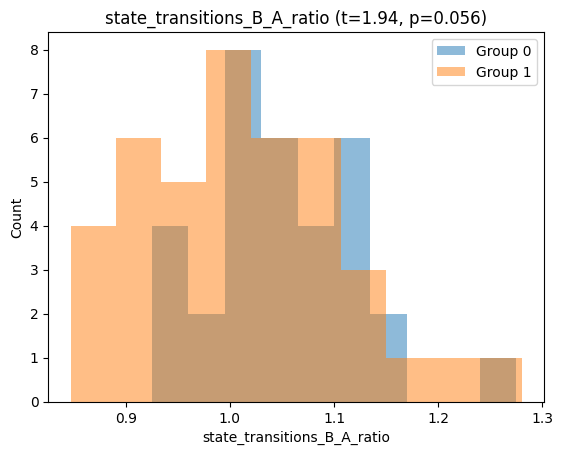

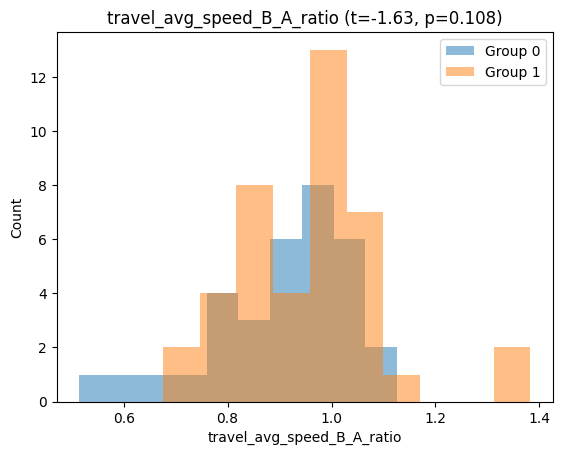

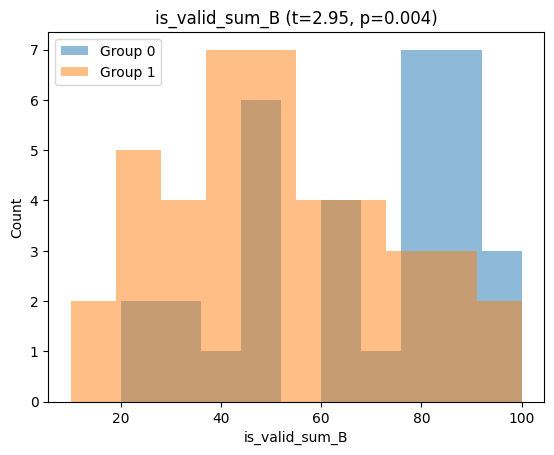

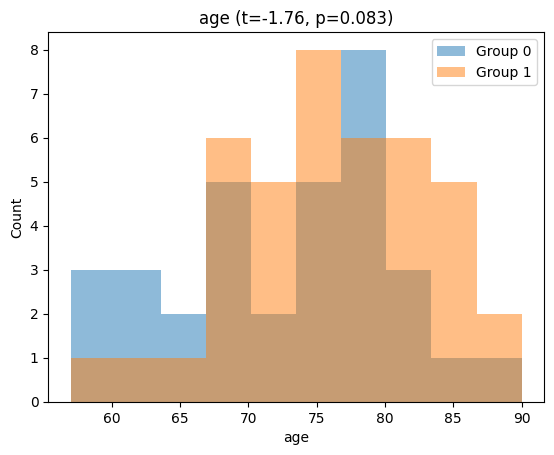

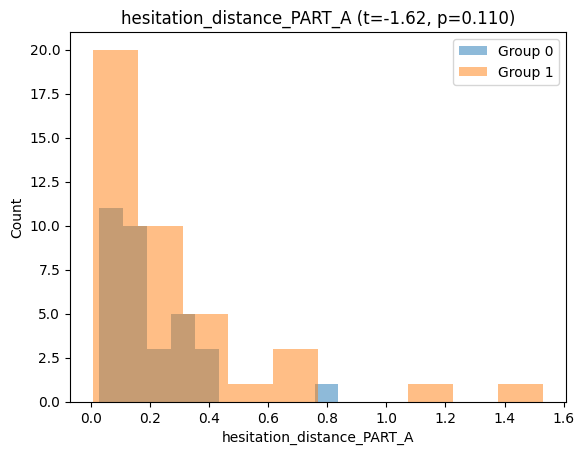

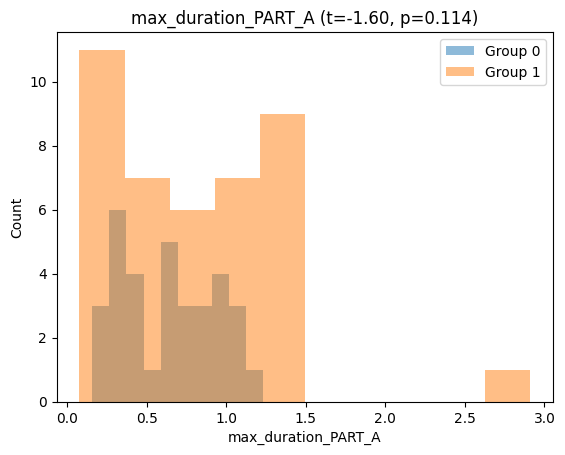

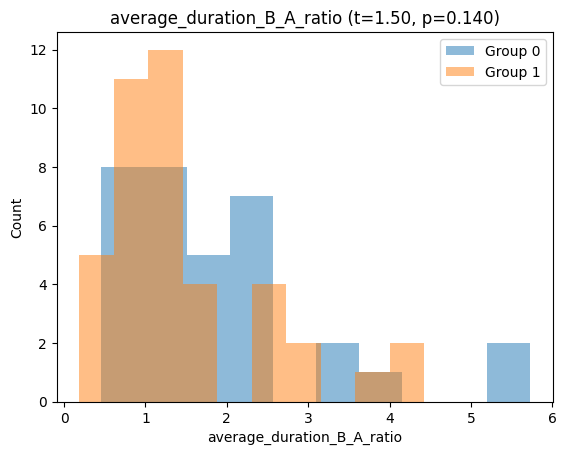

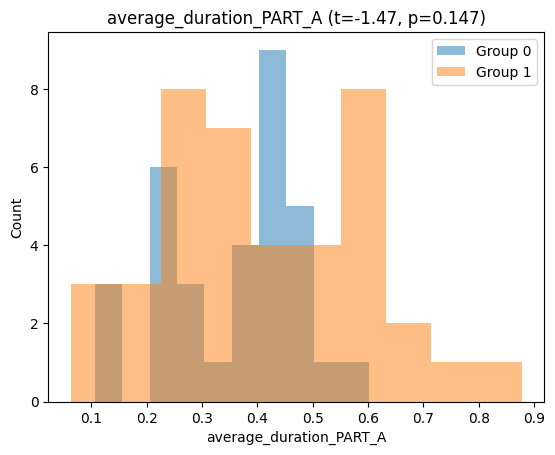

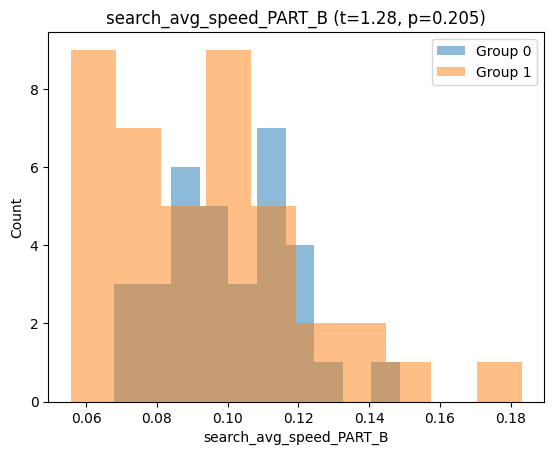

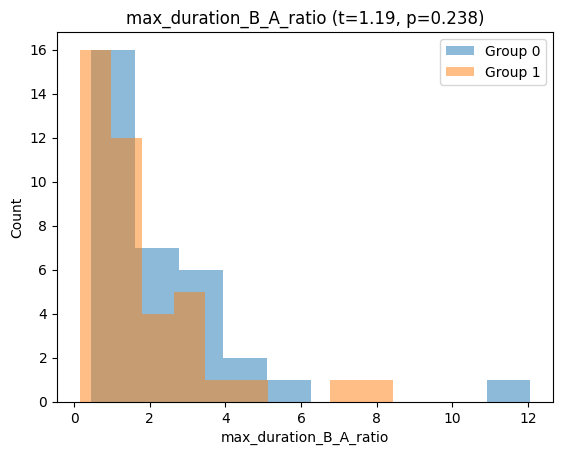

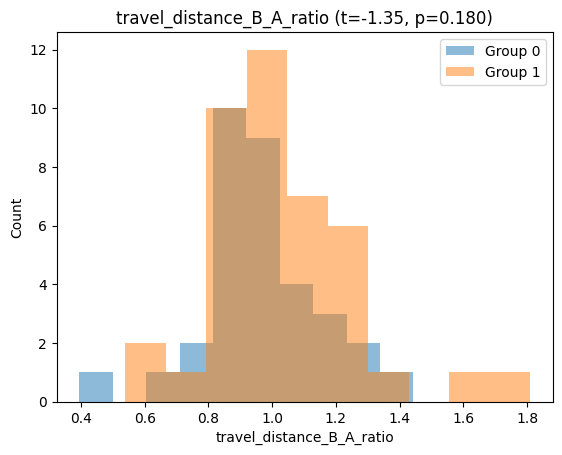

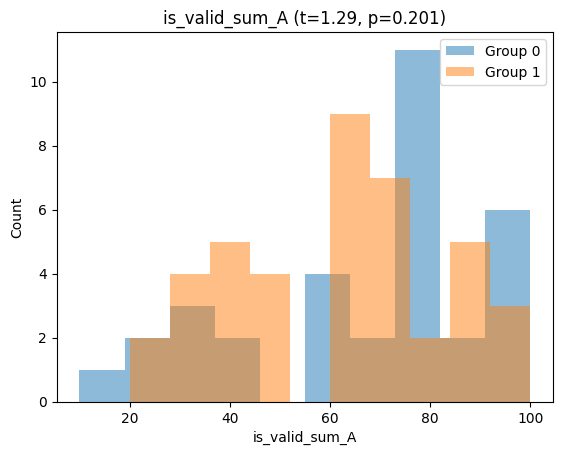

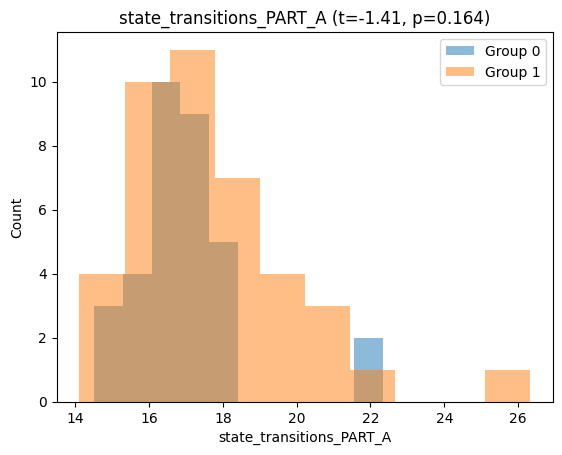

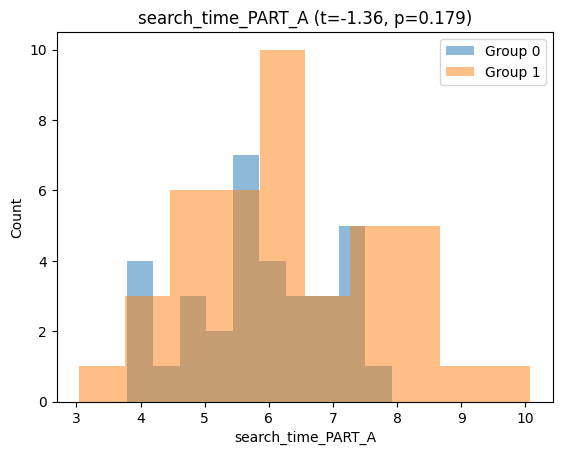

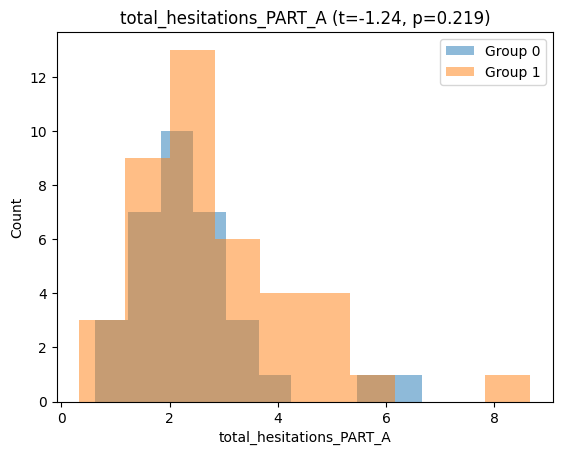

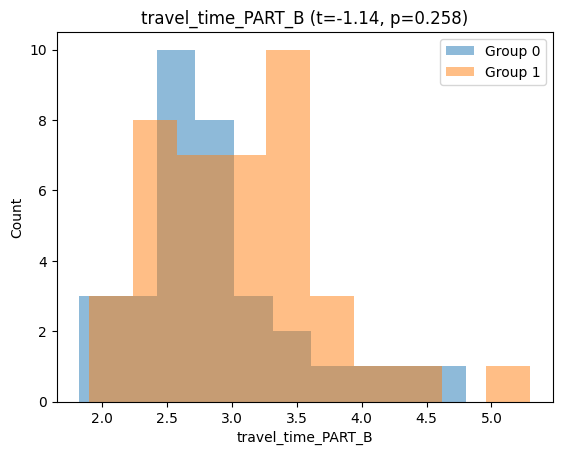

In [ ]:
res_digital = histograms_for_col(df_digital_plus_demo[kbest_list + ['group']])

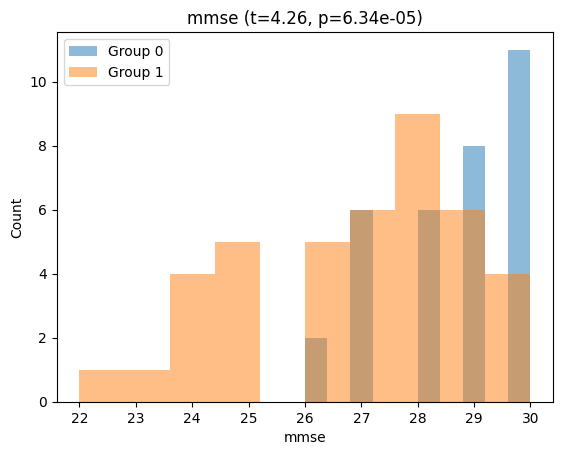

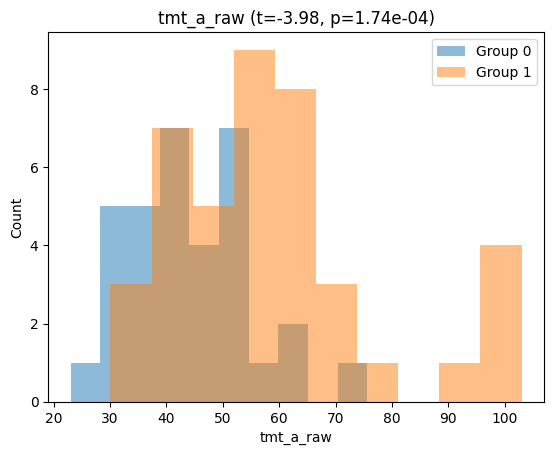

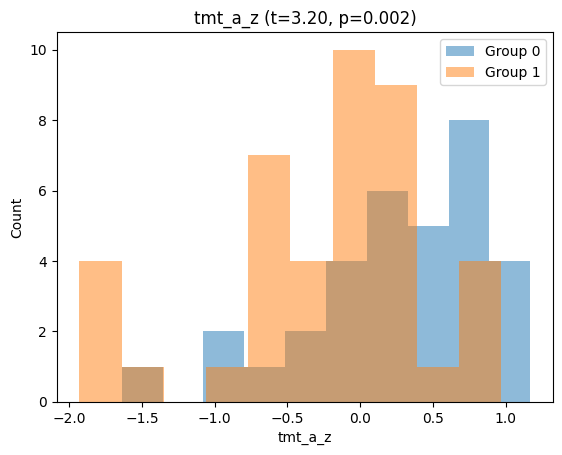

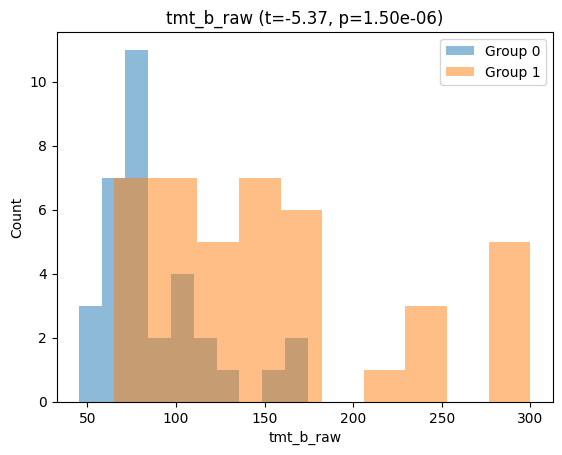

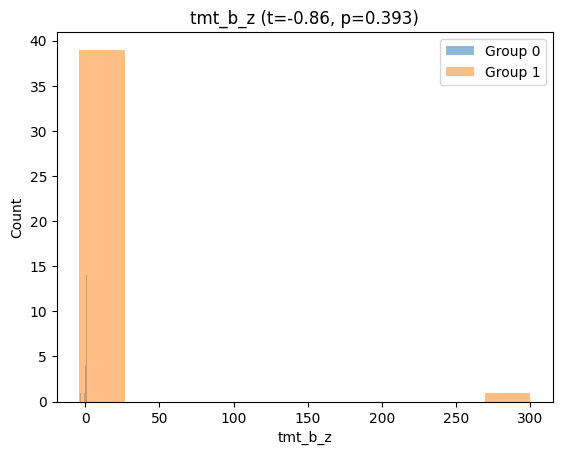

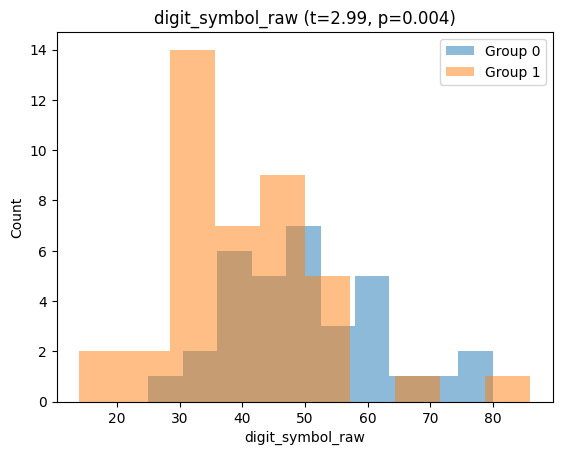

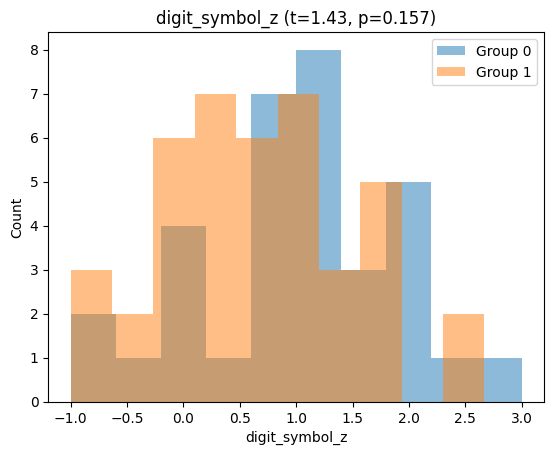

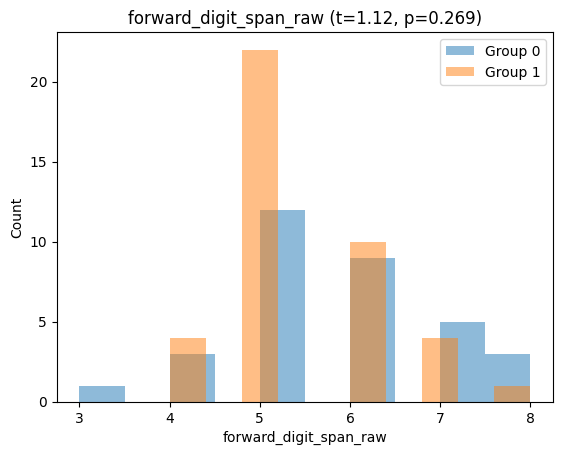

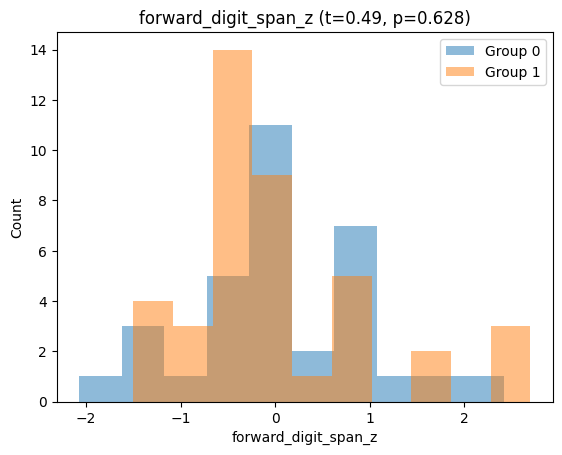

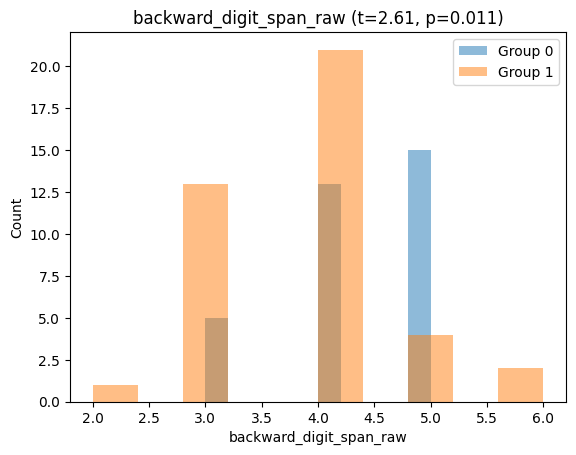

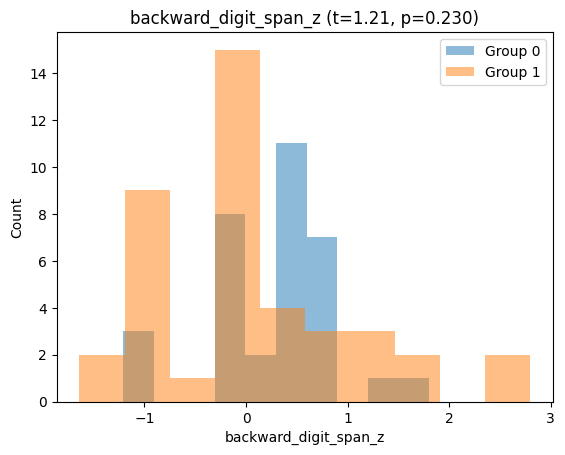

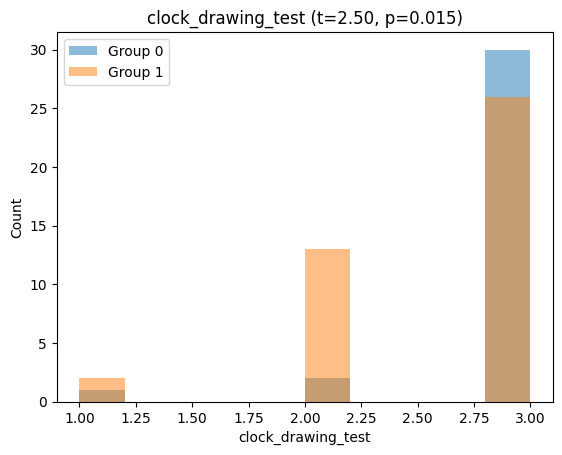

In [12]:
res_non_digital = histograms_for_col(df_non_digital)

In [11]:
res_digital[res_digital['p_value'] < 0.05]

,variable,t_stat,p_value
0,distance_difference_from_ideal_PART_A,-2.124337,0.038038
1,hesitation_time_PART_A,-2.046421,0.044853
2,intra_target_time_PART_A,-2.352297,0.021526
5,non_cut_correct_targets_touches_PART_B,3.356230,0.001267
7,non_cut_rt_PART_B,-2.214017,0.030181
14,non_cut_correct_targets_touches_B_A_ratio,2.231301,0.028778
17,is_valid_sum_B,2.949520,0.004328


In [14]:
res_non_digital = res_non_digital[~res_non_digital['variable'].str.endswith('z')]
res_non_digital[res_non_digital['p_value'] < 0.05]

,variable,t_stat,p_value
0,mmse,4.263107,0.000063
1,tmt_a_raw,-3.977143,0.000174
3,tmt_b_raw,-5.366270,0.000002
5,digit_symbol_raw,2.993168,0.003839
9,backward_digit_span_raw,2.607027,0.011110
11,clock_drawing_test,2.504177,0.014579
